In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import tree, ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
df = pd.read_csv('D:\python_projects\start_up_dz\pds3_dz\lesson_35\petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df.describe().round(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000,48.000,48.000,48.000,48.000
mean,7.668,4241.833,5565.417,0.570,576.771
std,0.951,573.624,3491.507,0.055,111.886
min,5.000,3063.000,431.000,0.451,344.000
25%,7.000,3739.000,3110.250,0.530,509.500
50%,7.500,4298.000,4735.500,0.564,568.500
75%,8.125,4578.750,7156.000,0.595,632.750
max,10.000,5342.000,17782.000,0.724,968.000


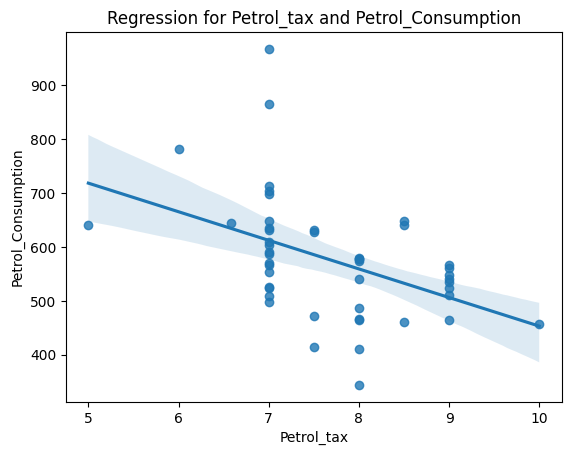

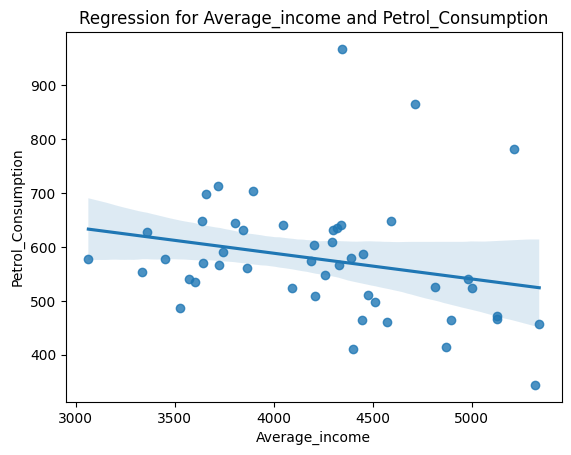

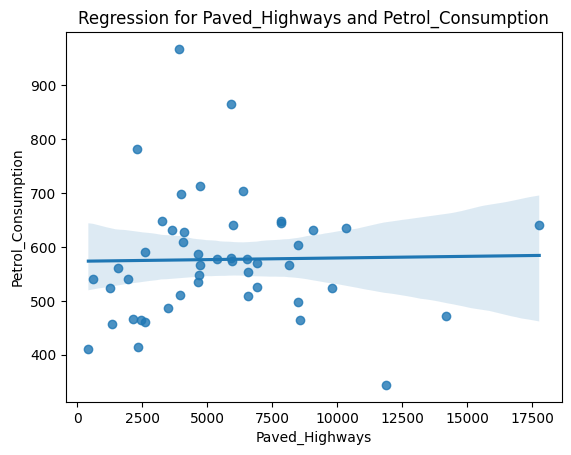

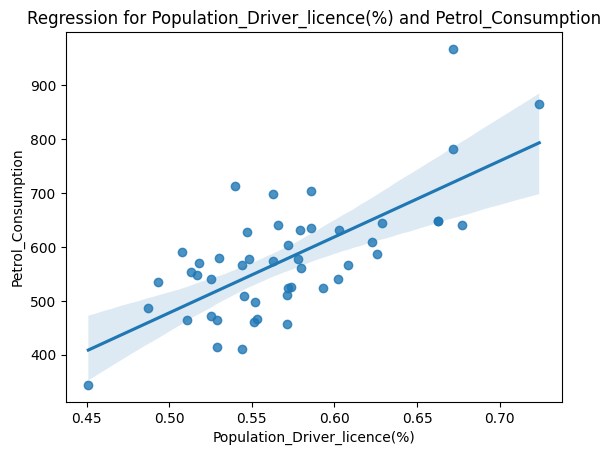

In [4]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression for {var} and Petrol_Consumption')

In [5]:
corr = df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, "Pirson's Correlation")]

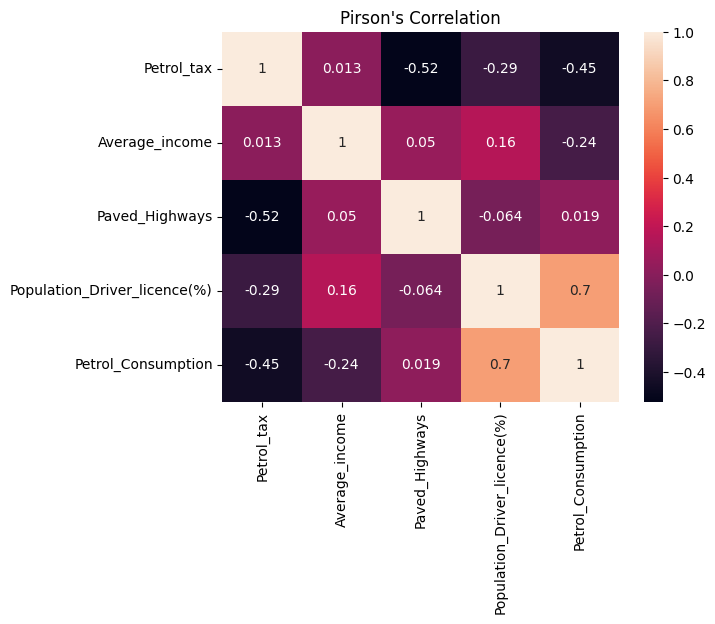

In [6]:
sns.heatmap(corr, annot=True).set(title='Pirson\'s Correlation')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[variables], df['Petrol_Consumption'], random_state=1)

In [8]:
lin_reg = LinearRegression().fit(x_train, y_train)

In [9]:
print('Intercept:', lin_reg.intercept_)
print('Coefficients:', lin_reg.coef_)

Intercept: 374.0014191296234
Coefficients: [-3.29250302e+01 -7.23995008e-02 -1.82584323e-03  1.35767096e+03]


In [10]:
y_pred = lin_reg.predict(x_test)

In [11]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
33,628,619.140284
23,547,462.759058
38,648,725.124513
36,640,652.494906
2,561,582.405446
3,414,488.393504
31,554,586.664264
26,577,595.113657
44,782,707.039635
27,631,618.162733


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}', f'MSE: {mse}', f'RMSE: {rmse}', sep='\n')

MAE: 39.570304241098675
MSE: 2384.410750069735
RMSE: 48.830428526378256


In [13]:
lin_reg.score(x_train, y_train)

0.6776136672089365

In [17]:
lin_reg.score(x_test, y_test)

0.6657211902327582

Показник прогнозування моделі доволі не високий, спробуємо провести К-кратну кросс валідацію

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
train_test_folds = []


for train_index, test_index in kf.split(df[variables], df['Petrol_Consumption']):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    train_test_folds.append((train_index, test_index))
    cnt += 1

Fold:1, Train set: 38, Test set:10
Fold:2, Train set: 38, Test set:10
Fold:3, Train set: 38, Test set:10
Fold:4, Train set: 39, Test set:9
Fold:5, Train set: 39, Test set:9


In [19]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [20]:
x, y = df[variables].values.reshape(-1, 4), df['Petrol_Consumption'].values.reshape(-1, 1)

In [21]:
score = cross_val_score(LinearRegression(), x, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [ -4083.25587175 -10468.85637678  -2453.65941292  -3853.05818469
  -3173.21607154]
rmse= 69.33


Як бачимо значення MSE не покращилось від нашого минулого значення MSE: 2384.41, найближче значення до нього трохи більше, 2453.66. Також середнє значення значення RMSE по п'яти фолдам вище значення минулого RMSE. Заради експерименту спробуємо навчити нашу модель по третьому фолду і порівняємо результати

In [22]:
x_train, x_test, y_train, y_test = df.loc[train_test_folds[2][0], variables], df.loc[train_test_folds[2][1], variables], df['Petrol_Consumption'][train_test_folds[2][0]], df['Petrol_Consumption'][train_test_folds[2][1]]
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [23]:
print('intercept: ', LinReg.intercept_, '\n', 'coefficient: ', LinReg.coef_, sep='')

intercept: 485.89546349580496
coefficient: [-4.24192157e+01 -8.02662841e-02 -3.60417428e-03  1.36388766e+03]


In [24]:
y_pred = LinReg.predict(x_test)

In [25]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,541,526.410793
5,457,406.896304
11,471,421.218577
16,603,600.840387
29,534,470.720837
30,571,578.398662
31,554,597.341871
32,577,665.499542
34,487,514.978987
46,610,679.123163


In [26]:
LinReg.score(x_train, y_train)

0.6889941739718713

In [27]:
LinReg.score(x_test, y_test)

0.0522203245008257

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}', f'MSE: {mse}', f'RMSE: {rmse}', sep='\n')

MAE: 41.62553272517765
MSE: 2453.6594129160376
RMSE: 49.53442654271913


Покращень показників моделі третій фолд нам не приніс як і очікувалось, навіть прогнозування моделі по тестовим даним впало до 0.05, що є дуже суттєвим погіршенням
Навчимо нашу модель за допомогою Decision Tree Regressor та Random Forest Regressor і порівняємо результати

In [31]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), x, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')

Scores for each fold: [-17347.7        -17412.3         -6389.6         -7350.66666667
 -13087.22222222]


In [37]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), x, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')

D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation

Scores for each fold are: [ -7539.12317    -12797.03298     -3600.52778     -2946.84586667
  -6053.55496667]


D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [38]:
for depth in range(1, 11):
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= depth, random_state= 42), x, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {depth}')
    print(score)

For max depth: 1
[-11568.41905669 -18676.71671007  -2952.08875433  -4973.03703704
  -7952.84156379]
For max depth: 2
[-17378.15008788 -15955.30025826  -3165.13689796  -6080.74486521
 -17614.66898148]
For max depth: 3
[-14718.3989093  -14822.43455005  -6672.89600694  -7999.05607208
 -13396.88292013]
For max depth: 4
[-16168.19120661 -17501.2391875   -4233.8596301   -4605.1775737
 -12856.45583333]
For max depth: 5
[-15649.44259259 -16677.7875      -4644.4377551   -5090.82168052
 -13418.71222222]
For max depth: 6
[-16305.06875    -17634.825       -5263.65694444  -8452.2816358
 -13346.91666667]
For max depth: 7
[-17133.141      -17424.025       -6588.71111111  -4795.54012346
 -28808.44444444]
For max depth: 8
[-17372.225      -17356.3         -5189.6         -7575.58333333
 -28808.44444444]
For max depth: 9
[-17349.37777778 -17412.3         -6389.6         -7350.66666667
 -13087.22222222]
For max depth: 10
[-17333.6        -17412.3         -6389.6         -7350.66666667
 -13087.22222222]


In [39]:
estimators = [50, 100, 150, 200, 250, 300, 350]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), x, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    print(score)

D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation

For estimators: 50
[ -8924.18384    -13586.56636     -4110.98024     -3018.50008889
  -4709.89835556]


D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation

For estimators: 100
[ -7539.12317    -12797.03298     -3600.52778     -2946.84586667
  -6053.55496667]


D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation

For estimators: 150
[ -7718.03307556 -12892.13303111  -3556.93436889  -2650.3584
  -6075.32410864]


D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation

For estimators: 200
[ -7386.92633    -12827.9109925   -3583.4511125   -2551.78685556
  -5769.67388056]


D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation

For estimators: 250
[ -7386.9486592  -12848.0284256   -3638.733       -2462.92653156
  -5494.73130844]


D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation

For estimators: 300
[ -7644.80575111 -12854.77825556  -3611.80355111  -2389.57579259
  -5693.67428148]


D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\model_selection\_validation

For estimators: 350
[ -7875.43454367 -13049.58297224  -3475.86124408  -2451.3896
  -5643.46089796]


# Як бачимо покращення показника RMSE не відбувається